# The Perceptron

A demo script on how a single neuron perceptron works, using the iris dataset

In [60]:
__author__ = "Alastair Garner"
__email__ = "alastairgarner@outlook.com"

### Dependencies

%matplotlib notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [42]:
iris = sns.load_dataset("iris")
iris = iris[iris["species"]!="virginica"]
iris["group"] = iris.groupby("species").ngroup()

In [43]:
x = iris[["petal_length","petal_width"]].values.T
w = np.random.randn(3)
teacher = iris.groupby("species").ngroup()
e = np.e

In [44]:
activation_function = lambda x: 1/(1 + np.e**(-1*x))
activation_derivative = lambda x: (e**(-x))/((1+e**(-x))**2)

<IPython.core.display.Javascript object>


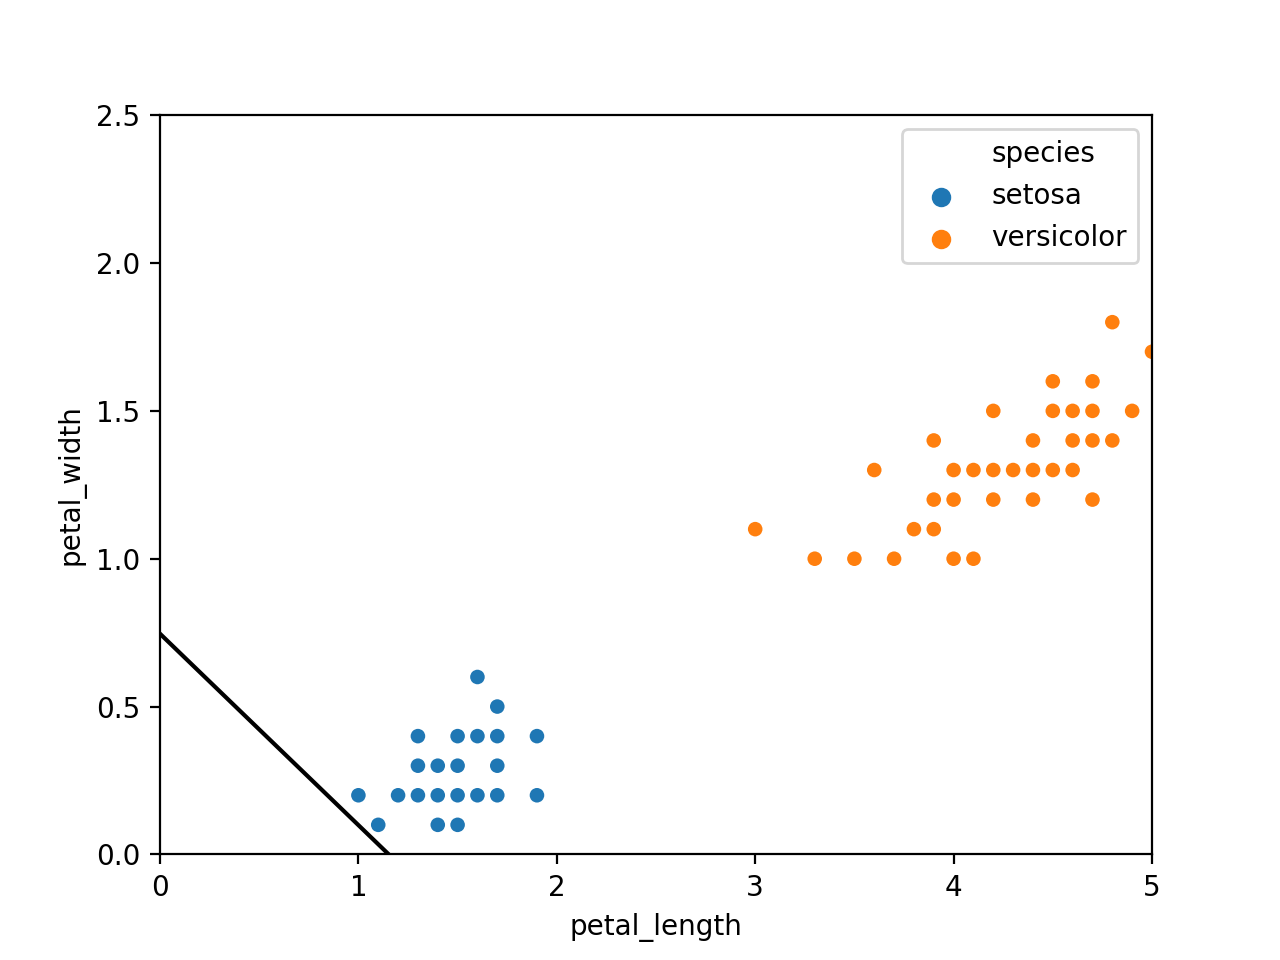

(0, 2.5)

In [45]:
fig,ax = plt.subplots(1,1)
ax = sns.scatterplot(data=iris,x="petal_length",y="petal_width",hue="species")
lx = np.arange(6)
ly = -(w[1]*lx+w[0])/w[2]
line = ax0.plot(lx,ly,"k")
ax.set_xlim([0, 5])
ax.set_ylim([0, 2.5])

In [46]:
learning_rate = float(input("Choose learning rate (Between 0 & 1): ")) 
iterations = int(input("Choose number of iterations: "))

Choose learning rate (Between 0 & 1): 0.01
Choose number of iterations: 100


In [ ]:
def run_iteration(x,w,teacher):
    for ii in range(len(teacher)):
        
        # Sum the inputs * weights 
        sum_inputs = np.array(w[0] + (x[0,ii]*w[1]) + (x[1,ii]*w[2]))
        
        # Apply the activation function
        activation = 1/(1 + e**(-sum_inputs))
        
        # Calculate the loss
        loss = .5*(teacher[ii] - activation)**2
        cumulative_loss = cumulative_loss + loss
        
        # Accumulate change in weights
        dw = dw + (teacher[ii] - activation) * (e**(-sum_inputs))/((1+e**(-sum_inputs))**2) * np.concatenate(([1],x[:,ii]))
    w = w + learning_rate*dw
    return w

<IPython.core.display.Javascript object>


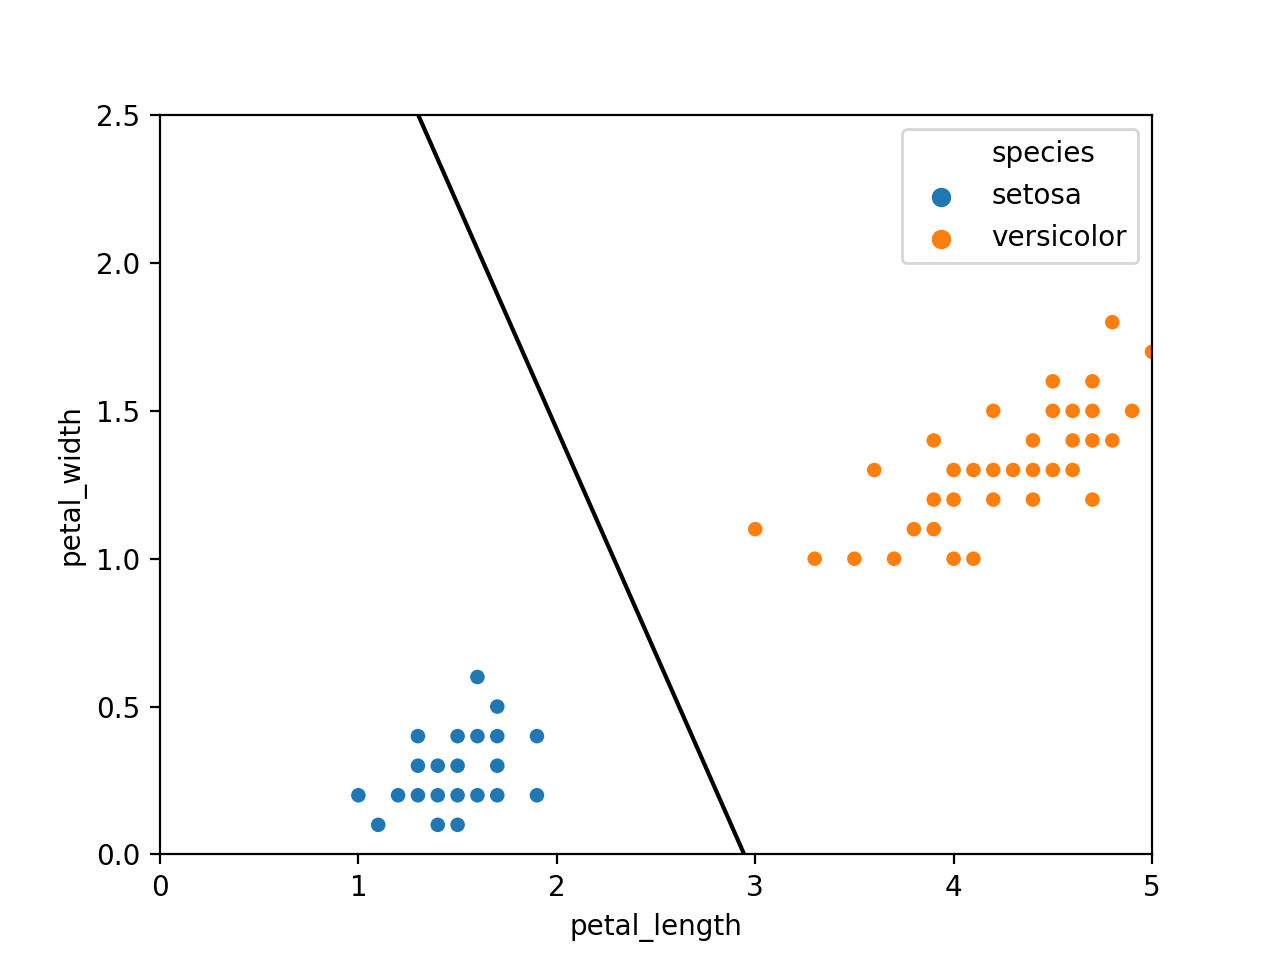

In [62]:
fig,ax = plt.subplots(1,1)
sns.scatterplot(data=iris,x="petal_length",y="petal_width",hue="species",ax=ax)
line = ax.plot(lx,ly,"k")
ax.set_xlim([0, 5])
ax.set_ylim([0, 2.5])
w = np.random.randn(3)

cumulative_loss = [0]
for jj in range(iterations):
    dw = np.zeros(3)
    for ii in range(len(teacher)):
        # Sum the inputs * weights 
        sum_inputs = np.array(w[0] + (x[0,ii]*w[1]) + (x[1,ii]*w[2]))
        # Apply the activation function
        activation = 1/(1 + e**(-sum_inputs))
        # Calculate the loss
        loss = .5*(teacher[ii] - activation)**2
        cumulative_loss = cumulative_loss + loss
        # Accumulate change in weights
        dw = dw + (teacher[ii] - activation) * (e**(-sum_inputs))/((1+e**(-sum_inputs))**2) * np.concatenate(([1],x[:,ii]))
    w = w + learning_rate*dw
    
    line[0].set_ydata(-(w[1]*lx+w[0])/w[2])
    time.sleep(0.05)
    fig.canvas.draw()